In [129]:
#Pokemon type advantage analysis by notDavid
#This is the code for the pokemon type advantage network. Please note that while I do a lot of programming, 
#I in no way consider myself to be a great programmer. I have tried to make this comprehensible but I'm sure its not great


#CALL THE NECCESSARY MODULES
#most of these should come by default with python3... except maybe not networkx. It should be easy to install with a single pip command.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import collections

In [130]:
#DEFINE THE ADVANTAGE LIST
#each element (18 in total) 
typelabels = {0:"bug", 1:"dark", 2:"dragon",3:"lightning",4:"fairy",5:"fight",6:"fire",7:"flying",8:"ghost",9:"grass",10:"ground",11:"ice",12:"normal",13:"poison", 14:"psychic",15:"rock",16:"steel",17:"water"}

#The first element of each list is the node, followed by the type(s) it is advantageous against
advantageList = [(0,1,9,14),(1,8,14),(2,2), (3,7,17),(4,1,2,5), (5,1,11,12,15,16), (6,0,9,11,16), (7,0,9,5), (8,8,14),(9,10,15,17),(10,3,6,13,15,16),(11,2,7,9,10),(12,float("nan")),(13,4,9),(14,5,13),(15,0,6,7,11),(16,4,11,15),(17,6,10,15)]

#Now make a list of tuples [I,J] that say node I is linked to node J
edges = []
for i in advantageList:
    for j in i[1:]:
        if not math.isnan(j):
            edges.append([i[0],j])

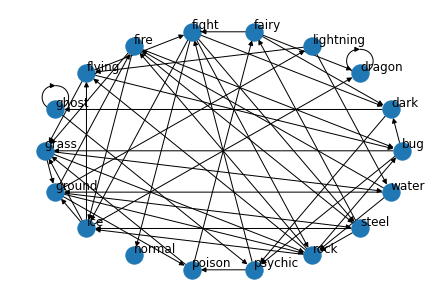

In [131]:
##pokemon graph
#Now we want to draw the network (also called graph)
Nnodes = 18
G = nx.DiGraph()
G.add_nodes_from(range(0,18))
G.add_edges_from(edges)

G = nx.relabel_nodes(G, typelabels)

nodepos = nx.circular_layout(G)
nx.draw(G,pos=nodepos, with_labels = True,  horizontalalignment='left', verticalalignment = 'bottom') #directed links mean advantageous against

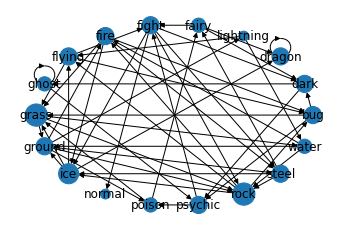

In [132]:
## This will plot the network using a radius that is proportional the elements IN degree
#we can think of this as IN degree centrality

plt.subplots(1)
in_degree = dict(G.in_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in in_degree.values()])



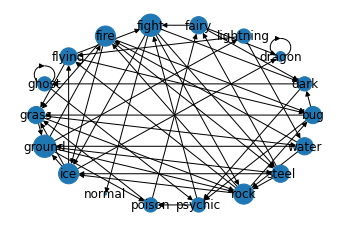

In [133]:
## This will plot the network using a radius that is proportional the elements OUT degree
#we can think of this as OUT degree centrality


plt.subplots(1)
out_degree = dict(G.out_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in out_degree.values()]) #directed links mean advantageous against



In [134]:
degreesList = [val for (node, val) in G.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE      : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:10}: {1:6}, {2:3}, {3}".format(list(typelabels.values())[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE      : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug       :      6,   3, 3
dark      :      5,   2, 3
dragon    :      4,   1, 3
lightning :      3,   2, 1
fairy     :      5,   3, 2
fight     :      8,   5, 3
fire      :      7,   4, 3
flying    :      6,   3, 3
ghost     :      4,   2, 2
grass     :      8,   3, 5
ground    :      8,   5, 3
ice       :      8,   4, 4
normal    :      1,   0, 1
poison    :      4,   2, 2
psychic   :      5,   2, 3
rock      :      9,   4, 5
steel     :      6,   3, 3
water     :      5,   3, 2


In [135]:
print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
[print(tupe) for tupe in sorted(G.out_degree, key=lambda x: x[1], reverse=True)]
print()

print("In degrees:")
#print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.
[print(tupe) for tupe in sorted(G.in_degree, key=lambda x: x[1], reverse=True)]
print()

Out degrees:
('fight', 5)
('ground', 5)
('fire', 4)
('ice', 4)
('rock', 4)
('bug', 3)
('fairy', 3)
('flying', 3)
('grass', 3)
('steel', 3)
('water', 3)
('dark', 2)
('lightning', 2)
('ghost', 2)
('poison', 2)
('psychic', 2)
('dragon', 1)
('normal', 0)

In degrees:
('grass', 5)
('rock', 5)
('ice', 4)
('bug', 3)
('dark', 3)
('dragon', 3)
('fight', 3)
('fire', 3)
('flying', 3)
('ground', 3)
('psychic', 3)
('steel', 3)
('fairy', 2)
('ghost', 2)
('poison', 2)
('water', 2)
('lightning', 1)
('normal', 1)



In [136]:
#get the average degrees
print(np.mean(degreesList))
print(np.mean(out_degreesList))
print(np.mean(in_degreesList))

5.666666666666667
2.8333333333333335
2.8333333333333335


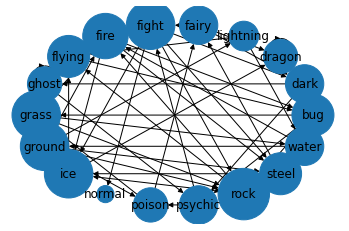

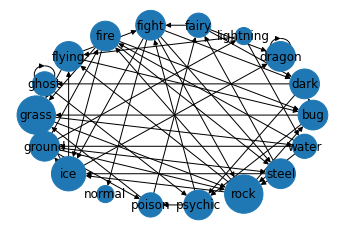

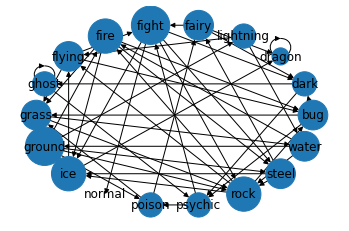

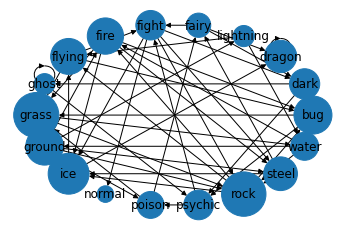

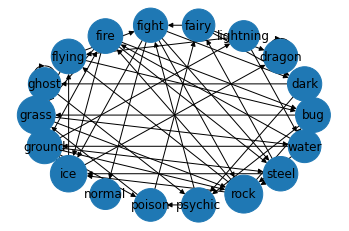

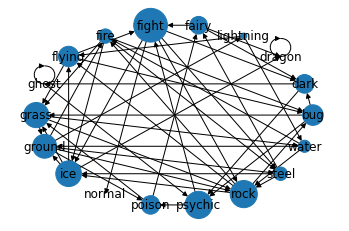

In [137]:
#Centrality Analysis
#Now we'll use different centrality measures and plot the result as the radius of the element in the network
#I can't go into what these are if you dont know them here, but there are plenty of websites that explain these in plain language.

#Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.degree_centrality(G).values()]) #directed links mean advantageous against

#in-Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.in_degree_centrality(G).values()]) #directed links mean advantageous against

#out-Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.out_degree_centrality(G).values()]) #directed links mean advantageous against

#eigenvector centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.eigenvector_centrality(G).values()]) #directed links mean advantageous against

#Katz centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.katz_centrality(G).values()]) #directed links mean advantageous against

#betweeness centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.betweenness_centrality(G).values()]) #directed links mean advantageous against




In [138]:
#Find all triangles (also called cyclic triads), like Water>Fire>Grass>Water....

G2 = G
#triad_type doesn't work if self loops are present, but we don't care about those anyway in this analysis so get rid of them
G2.remove_edges_from(nx.selfloop_edges(G2)) 

#don't worry about this stuff
count = 1;
for i in nx.all_triads(G2):
    if len(i.edges) == 3:
        #this next line is annoying. Its from a page 15/32 of a pdf linked in the documentation for triad_type.
        #pdf is here: https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf
        if nx.triad_type(i) == '030C':  
            print(i.nodes)
            count += 1

            
#print out the triangles            
print(count)            


['grass', 'rock', 'bug']
['fight', 'dark', 'psychic']
['water', 'lightning', 'ground']
['fight', 'steel', 'fairy']
['fight', 'flying', 'ice']
['fight', 'flying', 'rock']
['grass', 'fire', 'ground']
['grass', 'fire', 'rock']
['grass', 'fire', 'water']
['fire', 'ice', 'ground']
['steel', 'fire', 'rock']
['grass', 'flying', 'rock']
['grass', 'poison', 'ground']
['grass', 'ice', 'rock']
['ice', 'ground', 'rock']
['steel', 'ice', 'ground']
17


In [139]:
#This is to test for any 2-cycles. 0 means no 2-cycles in the network.
nx.reciprocity(G)

0.0

In [159]:
# Begin addition for dual-types. Will define the graph as:
#  a node is a pair of types, including two of the same type, e.g. "Water-Water"
#   this means there will be 17*17 nodes = 289
#  a directed edge between two nodes exists from a source towards a target if:
#   the target has either of its two types as weak to either of the two types of the source
#   note, this is NOT the behavior in the games, as weaknesses and resitences "cancel out", that analysis to follow.


# first, convert type advantages to strings as debugging by index will quickly become untenable.
advantages_by_name = {}
for advantage_tuple in advantageList:
    strong_against = [typelabels[i] for i in advantage_tuple[1:] if not math.isnan(i)]
    advantages_by_name[typelabels[advantage_tuple[0]]] = strong_against
    
# for k, v in advantages_by_name.items():
#     print(k, v)

types = list(typelabels.values())
    
# Next, define the nodes:
dual_type_nodes = []
# and a lookup table for types to nodes, to add edges in the next step
nodes_by_type = {}
for t in types:
    nodes_by_type[t] = set()
    
for i in range(len(types)):
    primary = types[i]
    for j in range(i, len(types)):
        secondary = types[j]
        node_name = ""
        if primary == secondary:
            node_name = primary
        else:
            node_name = "{}-{}".format(primary, secondary)
        dual_type_nodes.append(node_name)
        nodes_by_type[primary].add(node_name)
        nodes_by_type[secondary].add(node_name)

# print(dual_type_nodes)
print("number of nodes: ", len(dual_type_nodes))


print()
# Next, define the edges:
dual_type_edges = set()
for source, targets in advantages_by_name.items():
    source_nodes = nodes_by_type[source]
    target_nodes = set()
    for t in targets:
        target_nodes.update(nodes_by_type[t])
    
    new_edges = []
    for s in source_nodes:
        for t in target_nodes:
            new_edges.append((s, t))
    dual_type_edges.update(new_edges)

# as you might expect, there are a lot of edges
# print(dual_type_edges)
print("number of edges: ", len(dual_type_edges))

number of nodes:  171

number of edges:  13512


In [168]:
# now, we won't try to render this graph (mostly because the below commented out sections look pretty rough)
#   but we will run the analysis:

dual_G = nx.DiGraph()
dual_G.add_nodes_from(dual_type_nodes)
dual_G.add_edges_from(dual_type_edges)

degreesList = [val for (node, val) in dual_G.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in dual_G.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in dual_G.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:20}: {1:6}, {2:3}, {3:3}".format(dual_type_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                 :    102,  51,  51
bug-dark            :    159,  66,  93
bug-dragon          :    159,  66,  93
bug-lightning       :    146,  80,  66
bug-fairy           :    160,  80,  80
bug-fight           :    185, 105,  80
bug-fire            :    173,  93,  80
bug-flying          :    160,  80,  80
bug-ghost           :    146,  66,  80
bug-grass           :    186,  93,  93
bug-ground          :    209, 116,  93
bug-ice             :    173,  93,  80
bug-normal          :    117,  51,  66
bug-poison          :    146,  66,  80
bug-psychic         :    173,  80,  93
bug-rock            :    221, 105, 116
bug-steel           :    173,  93,  80
bug-water           :    173,  93,  80
dark                :     86,  35,  51
dark-dragon         :    131,  51,  80
dark-lightning      :    132,  66,  66
dark-fairy          :    160,  80,  80
dark-fight          :    185, 105,  80
dark-fire           :    186,  93,  9

In [161]:
# Will run and produce a... graph? it's impossible to interpret as far as I can tell, though

# nodepos = nx.circular_layout(G)
# nx.draw(G,pos=nodepos, with_labels = False,  horizontalalignment='left', verticalalignment = 'bottom') #directed links mean advantageous against

In [162]:
# Now, we improve the type interaction model, where we appropriately account for type resistance.
# following the model above for definitions.

disadvantageList = [['fire', 'fight', 'poison', 'flying', 'ghost', 'steel', 'fairy'], ['fight', 'dark', 'fairy'], ['steel'], ['lightning', 'grass', 'dragon'], ['fire', 'poison', 'steel'], ['poison', 'flying', 'psychic', 'bug', 'fairy'], ['fire', 'water', 'rock', 'dragon'], ['lightning', 'rock', 'steel'], ['dark'], ['fire', 'grass', 'poison', 'flying', 'bug', 'dragon', 'steel'], ['grass', 'bug'], ['fire', 'water', 'ice', 'steel'], ['rock', 'steel'], ['poison', 'ground', 'rock', 'ghost'], ['psychic', 'steel'], ['fight', 'ground', 'steel'], ['fire', 'water', 'lightning', 'steel'], ['water', 'grass', 'dragon']]
immunityList = [[], [], ['fairy'], ['ground'], [], ['ghost'], [], [], ['normal'], [], ['flying'], [], ['ghost'], ['steel'], ['dark'], [], [], []]


In [175]:
disadvantages_by_name = {}
immunities_by_name = {}
for i in range(len(types)):
    t = types[i]
    disadvantages = disadvantageList[i]
    disadvantages_by_name[t] = disadvantages
    immunities = immunityList[i]
    immunities_by_name[t] = immunities
    
# for k, v in disadvantages_by_name.items():
#     print(k, v)
# print()
# for k, v in immunities_by_name.items():
#     print(k, v)

print()

# Next, define the edges by type advantage model:
#   if against one type is advantaged and another is disadvantaged, "cancel out" and do not be an edge
#   if against at least one type is advantaged, be an edge
#   if either type is immune, do not be an edge
canceling_out_dual_type_edges = set()
attack_type_to_super_effective_targets = {}
for source in types:
    source_nodes = nodes_by_type[source]
    advantage_targets = advantages_by_name[source]
    advantage_nodes = set()
    [advantage_nodes.update(nodes_by_type[t]) for t in advantage_targets]

    disadvantage_targets = disadvantages_by_name[source]
    disadvantage_nodes = set()
    [disadvantage_nodes.update(nodes_by_type[t]) for t in disadvantage_targets]
    
    immune_targets = immunities_by_name[source]
    immune_nodes = set()
    [immune_nodes.update(nodes_by_type[t]) for t in immune_targets]
    
    target_nodes = set()
    for target_node in advantage_nodes:
        if target_node in immune_nodes:
            continue
        if target_node in disadvantage_nodes:
            continue
        target_nodes.add(target_node)

    attack_type_to_super_effective_targets[source] = target_nodes

    new_edges = []
    for s in source_nodes:
        for t in target_nodes:
            new_edges.append((s, t))
    canceling_out_dual_type_edges.update(new_edges)

# one simple check we can do is that many of the edges from the previous version are removed here:
# print(canceling_out_dual_type_edges)
print("number of canceling-out edges: ", len(canceling_out_dual_type_edges))
print("number of non-canceling-out edges: ", len(dual_type_edges))


bug
{'ground-psychic', 'psychic-rock', 'psychic-water', 'dark-ice', 'dark-normal', 'lightning-grass', 'dark-grass', 'dark-water', 'grass-rock', 'bug-psychic', 'normal-psychic', 'dark-ground', 'dragon-psychic', 'dark-lightning', 'grass-ground', 'dark-rock', 'ice-psychic', 'grass-water', 'dragon-grass', 'dark-psychic', 'psychic', 'lightning-psychic', 'dark-dragon', 'grass', 'grass-ice', 'grass-psychic', 'bug-grass', 'bug-dark', 'grass-normal', 'dark'}
dark
{'ground-psychic', 'psychic-rock', 'psychic-water', 'ghost-ground', 'lightning-ghost', 'psychic-steel', 'flying-psychic', 'bug-ghost', 'fire-ghost', 'bug-psychic', 'normal-psychic', 'ghost-psychic', 'dragon-psychic', 'ice-psychic', 'ghost-normal', 'psychic', 'ghost-water', 'ghost', 'ghost-grass', 'lightning-psychic', 'ghost-ice', 'fire-psychic', 'grass-psychic', 'ghost-steel', 'ghost-rock', 'dragon-ghost', 'ghost-poison', 'poison-psychic', 'flying-ghost'}
dragon
{'dark-dragon', 'dragon-water', 'dragon-poison', 'dragon-fight', 'dragon-

In [177]:
# this lets you see the dual types a particular attack, which are single-typed, is effective against:

for attack_type, targets in attack_type_to_super_effective_targets.items():
    print(attack_type, ":")
    print("    ", targets)
    print()

bug :
     {'ground-psychic', 'psychic-rock', 'psychic-water', 'dark-ice', 'dark-normal', 'lightning-grass', 'dark-grass', 'dark-water', 'grass-rock', 'bug-psychic', 'normal-psychic', 'dark-ground', 'dragon-psychic', 'dark-lightning', 'grass-ground', 'dark-rock', 'ice-psychic', 'grass-water', 'dragon-grass', 'dark-psychic', 'psychic', 'lightning-psychic', 'dark-dragon', 'grass', 'grass-ice', 'grass-psychic', 'bug-grass', 'bug-dark', 'grass-normal', 'dark'}

dark :
     {'ground-psychic', 'psychic-rock', 'psychic-water', 'ghost-ground', 'lightning-ghost', 'psychic-steel', 'flying-psychic', 'bug-ghost', 'fire-ghost', 'bug-psychic', 'normal-psychic', 'ghost-psychic', 'dragon-psychic', 'ice-psychic', 'ghost-normal', 'psychic', 'ghost-water', 'ghost', 'ghost-grass', 'lightning-psychic', 'ghost-ice', 'fire-psychic', 'grass-psychic', 'ghost-steel', 'ghost-rock', 'dragon-ghost', 'ghost-poison', 'poison-psychic', 'flying-ghost'}

dragon :
     {'dark-dragon', 'dragon-water', 'dragon-poison', 'd

In [178]:
# now we run the analysis again with the new model:

dual_G = nx.DiGraph()
dual_G.add_nodes_from(dual_type_nodes)
dual_G.add_edges_from(canceling_out_dual_type_edges)

degreesList = [val for (node, val) in dual_G.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in dual_G.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in dual_G.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:20}: {1:6}, {2:3}, {3:3}".format(dual_type_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                 :     81,  30,  51
bug-dark            :    129,  49,  80
bug-dragon          :    123,  43,  80
bug-lightning       :     90,  55,  35
bug-fairy           :    139,  59,  80
bug-fight           :    134,  68,  66
bug-fire            :    119,  68,  51
bug-flying          :    141,  61,  80
bug-ghost           :    132,  52,  80
bug-grass           :    147,  54,  93
bug-ground          :    157,  91,  66
bug-ice             :    133,  67,  66
bug-normal          :     81,  30,  51
bug-poison          :    112,  46,  66
bug-psychic         :    152,  59,  93
bug-rock            :    129,  78,  51
bug-steel           :     81,  63,  18
bug-water           :    119,  68,  51
dark                :     80,  29,  51
dark-dragon         :    123,  43,  80
dark-lightning      :    118,  52,  66
dark-fairy          :    120,  69,  51
dark-fight          :    130,  79,  51
dark-fire           :    137,  71,  6

In [179]:
print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
[print(tupe) for tupe in sorted(dual_G.out_degree, key=lambda x: x[1], reverse=True)]
print()

print("In degrees:")
#print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.
[print(tupe) for tupe in sorted(dual_G.in_degree, key=lambda x: x[1], reverse=True)]
print()

Out degrees:
('ground-ice', 109)
('flying-ground', 105)
('ground-rock', 104)
('fire-ground', 102)
('fairy-ground', 101)
('fight-rock', 92)
('bug-ground', 91)
('fight-ice', 91)
('ground-steel', 91)
('fairy-rock', 90)
('ice-rock', 90)
('fire-water', 89)
('lightning-ground', 88)
('fight-ground', 88)
('ground-poison', 88)
('fairy-fire', 86)
('fight-flying', 86)
('fire-ice', 86)
('ghost-ground', 86)
('dark-ground', 84)
('fight-fire', 83)
('fire-rock', 82)
('grass-ground', 82)
('grass-rock', 82)
('fight-ghost', 81)
('ice-steel', 81)
('rock-water', 81)
('fairy-water', 80)
('flying-rock', 80)
('flying-water', 80)
('dark-fight', 79)
('fire-grass', 79)
('ground-psychic', 79)
('ground-water', 79)
('ice-water', 79)
('psychic-rock', 79)
('bug-rock', 78)
('dragon-ground', 77)
('ghost-rock', 77)
('rock-steel', 77)
('fairy-fight', 76)
('fight-psychic', 76)
('dark-rock', 75)
('fight-water', 75)
('fire-steel', 75)
('flying-steel', 75)
('lightning-fire', 74)
('fight-steel', 74)
('flying-ice', 74)
('fairy

In [ ]:
# We see one additional finding about the starting trio's type interactions.
#   not only does one type have a attacking triangle, as described in the video,
#   but a resistance graph in the opposite direction:

# TODO left off here